In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import seaborn as sbs

In [2]:
# Script parameters
input_csv = "results-yasmin/parsec-phoenix.csv"
input_csv = "results-yasmin/parsec-simsmall.csv"
input_csv = "/home/marcel/TUM/Bachelor/results/results_verify silarge 4C 4T 4G.csv"
baseline = "x86_64,native,SW Fences const:simlarge:4" #:simlarge:4

In [3]:
# Parsing baseline argument
base_arch, base_runtime, base_tag = baseline.split(',')

In [4]:
# Read input file
df = pd.read_csv(input_csv, sep=';')
df

,Unnamed: 0,bench,dataset,arch,threads,cmdline,unit,retval,value,runtime,tag
0,0,parsec.blackscholes,simlarge,x86_64,4,/test/benchmarks-root/parsec-3.0-bins/pkgs/app...,seconds,0,4.486257,native,SW Fences const:simlarge:4
1,1,parsec.blackscholes,simlarge,x86_64,4,/test/benchmarks-root/parsec-3.0-bins/pkgs/app...,seconds,0,4.558882,native,SW Fences const:simlarge:4
2,2,parsec.blackscholes,simlarge,x86_64,4,/test/benchmarks-root/parsec-3.0-bins/pkgs/app...,seconds,0,4.646514,native,SW Fences const:simlarge:4
3,3,parsec.blackscholes,simlarge,x86_64,4,/test/benchmarks-root/parsec-3.0-bins/pkgs/app...,seconds,0,4.653195,native,SW Fences const:simlarge:4
4,4,parsec.blackscholes,simlarge,x86_64,4,/test/benchmarks-root/parsec-3.0-bins/pkgs/app...,seconds,0,4.553087,native,SW Fences const:simlarge:4
...,...,...,...,...,...,...,...,...,...,...,...
955,955,parsec.vips,simlarge,x86_64,4,/test/benchmarks-root/parsec-3.0-bins/pkgs/app...,seconds,0,16.120600,native,No Fences const:simlarge:4
956,956,parsec.vips,simlarge,x86_64,4,/test/benchmarks-root/parsec-3.0-bins/pkgs/app...,seconds,0,16.114121,native,No Fences const:simlarge:4
957,957,parsec.vips,simlarge,x86_64,4,/test/benchmarks-root/parsec-3.0-bins/pkgs/app...,seconds,0,16.142886,native,No Fences const:simlarge:4
958,958,parsec.vips,simlarge,x86_64,4,/test/benchmarks-root/parsec-3.0-bins/pkgs/app...,seconds,0,16.262862,native,No Fences const:simlarge:4


In [5]:
# Extract baseline from dataframe
base_df = df.loc[(df['arch'] == base_arch) & (df['runtime'] == base_runtime) & (df['tag'] == base_tag)]
base_df

,Unnamed: 0,bench,dataset,arch,threads,cmdline,unit,retval,value,runtime,tag
0,0,parsec.blackscholes,simlarge,x86_64,4,/test/benchmarks-root/parsec-3.0-bins/pkgs/app...,seconds,0,4.486257,native,SW Fences const:simlarge:4
1,1,parsec.blackscholes,simlarge,x86_64,4,/test/benchmarks-root/parsec-3.0-bins/pkgs/app...,seconds,0,4.558882,native,SW Fences const:simlarge:4
2,2,parsec.blackscholes,simlarge,x86_64,4,/test/benchmarks-root/parsec-3.0-bins/pkgs/app...,seconds,0,4.646514,native,SW Fences const:simlarge:4
3,3,parsec.blackscholes,simlarge,x86_64,4,/test/benchmarks-root/parsec-3.0-bins/pkgs/app...,seconds,0,4.653195,native,SW Fences const:simlarge:4
4,4,parsec.blackscholes,simlarge,x86_64,4,/test/benchmarks-root/parsec-3.0-bins/pkgs/app...,seconds,0,4.553087,native,SW Fences const:simlarge:4
...,...,...,...,...,...,...,...,...,...,...,...
155,155,parsec.vips,simlarge,x86_64,4,/test/benchmarks-root/parsec-3.0-bins/pkgs/app...,seconds,0,16.311817,native,SW Fences const:simlarge:4
156,156,parsec.vips,simlarge,x86_64,4,/test/benchmarks-root/parsec-3.0-bins/pkgs/app...,seconds,0,16.216553,native,SW Fences const:simlarge:4
157,157,parsec.vips,simlarge,x86_64,4,/test/benchmarks-root/parsec-3.0-bins/pkgs/app...,seconds,0,16.187026,native,SW Fences const:simlarge:4
158,158,parsec.vips,simlarge,x86_64,4,/test/benchmarks-root/parsec-3.0-bins/pkgs/app...,seconds,0,16.480571,native,SW Fences const:simlarge:4


In [6]:
# Get the mean for each baseline benchmark
base_means = {}
for b in set(base_df['bench']):
    base_means[b] = np.array(base_df.loc[base_df['bench'] == b]['value'].values, dtype=np.float32).mean()
base_means

{'parsec.fluidanimate': 19.403889,
 'parsec.bodytrack': 36.543205,
 'parsec.canneal': 43.847908,
 'parsec.streamcluster': 48.779167,
 'parsec.facesim': 113.54582,
 'parsec.ferret': 23.222775,
 'parsec.blackscholes': 4.5410285,
 'parsec.vips': 16.26381}

In [7]:
# Print the mean of every benchmark for each runtime
mean_df = pd.DataFrame()
for b in sorted(set(df['bench'])):
    df_b = df.loc[df['bench'] == b]
    tmp_dict = { 'bench': b }
    for t in set(df_b['tag']):
        df_b_t = df_b.loc[df_b['tag'] == t]
        tmp_dict[t] = [np.mean(df_b_t['value'])]
    tmp_df = pd.DataFrame.from_dict(tmp_dict)
    mean_df = pd.concat([mean_df, tmp_df], ignore_index=True)
   # mean_df_old = mean_df.append(tmp_dict, ignore_index=True)
mean_df

,bench,No Fences:simlarge:4,HW Fences:simlarge:4,No Fences const:simlarge:4,HW Fences const:simlarge:4,SW Fences:simlarge:4,SW Fences const:simlarge:4
0,parsec.blackscholes,4.474390,4.558284,4.531569,4.533346,4.509903,4.541029
1,parsec.bodytrack,35.575883,35.528468,36.083189,35.557511,36.474758,36.543201
2,parsec.canneal,43.370498,42.336506,43.981945,43.303399,46.081082,43.847907
3,parsec.facesim,108.322113,110.178592,111.798969,108.542859,114.357336,113.545827
4,parsec.ferret,21.766836,21.680195,21.815545,21.688490,23.100982,23.222776
5,parsec.fluidanimate,18.803728,18.936031,19.104798,19.122509,19.271060,19.403886
6,parsec.streamcluster,47.921866,48.740581,49.266902,48.802672,48.861568,48.779167
7,parsec.vips,16.048942,15.977970,16.149582,15.999265,16.180791,16.263812


In [8]:
# Normalize all results from original df to these means
df_norm = pd.DataFrame(columns=['arch', 'bench', 'dataset', 'threads', 'unit', 'value', 'runtime',
                                'tag', 'norm', 'label'])
norm_vals = []
for row in df.itertuples():
    try:
        if row.arch == base_arch and row.runtime == base_runtime and row.tag == base_tag:
            continue
        # norm = base_means[row.bench] / float(row.value)      # speedup
        norm = float(row.value) / base_means[row.bench]    # relative perf
        
        # norm = 100 * (base_means[row.bench] - float(row.value)) / base_means[row.bench]
        dct = row._asdict()
        dct['norm'] = norm
        dct['label'] = f"{dct['tag']}"
        # dct['label'] = f"{dct['runtime']}-{dct['tag']}"
        del dct['Index']
        del dct['cmdline']
        norm_vals.append(dct)
    except KeyError:
        pass
norm_vals_df = pd.DataFrame.from_dict(norm_vals)
df_norm = pd.concat([df_norm, norm_vals_df], ignore_index=True)
df_norm['norm'] = df_norm['norm'].apply(lambda x: x*100)
#df_norm = df_norm.append(norm_vals, ignore_index=True)
df_norm

,arch,bench,dataset,threads,unit,value,runtime,tag,norm,label,_1,retval
0,x86_64,parsec.blackscholes,simlarge,4,seconds,4.384485,native,HW Fences const:simlarge:4,96.552692,HW Fences const:simlarge:4,160.0,0.0
1,x86_64,parsec.blackscholes,simlarge,4,seconds,4.527324,native,HW Fences const:simlarge:4,99.698212,HW Fences const:simlarge:4,161.0,0.0
2,x86_64,parsec.blackscholes,simlarge,4,seconds,4.495885,native,HW Fences const:simlarge:4,99.005883,HW Fences const:simlarge:4,162.0,0.0
3,x86_64,parsec.blackscholes,simlarge,4,seconds,4.409606,native,HW Fences const:simlarge:4,97.105876,HW Fences const:simlarge:4,163.0,0.0
4,x86_64,parsec.blackscholes,simlarge,4,seconds,5.846981,native,HW Fences const:simlarge:4,128.758949,HW Fences const:simlarge:4,164.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
795,x86_64,parsec.vips,simlarge,4,seconds,16.120600,native,No Fences const:simlarge:4,99.119464,No Fences const:simlarge:4,955.0,0.0
796,x86_64,parsec.vips,simlarge,4,seconds,16.114121,native,No Fences const:simlarge:4,99.079622,No Fences const:simlarge:4,956.0,0.0
797,x86_64,parsec.vips,simlarge,4,seconds,16.142886,native,No Fences const:simlarge:4,99.256487,No Fences const:simlarge:4,957.0,0.0
798,x86_64,parsec.vips,simlarge,4,seconds,16.262862,native,No Fences const:simlarge:4,99.994179,No Fences const:simlarge:4,958.0,0.0


In [9]:
# Change data labels and benchmark names to more readable format
readable_name_dict = {
    'HW Fences':       'HW Fences (runtime)',
    'TSO const':       'HW Fences (compile time)',
    'HW Fences const': 'HW Fences (compile time)',
    'No Fences':       'No Fences [incorrect] (runtime)',
    'No Fences const': 'No Fences [incorrect] (compile time)',
    'SW Fences':       'SW Fences (runtime)',
    'SW Fences const': 'SW Fences (compile time)'
}

bench_readable_dict = {
    'parsec.canneal' : 'Canneal',
    'parsec.fluidanimate' : 'Fluid Animate',
    'parsec.blackscholes' : 'Black-Scholes',
    'parsec.streamcluster' : 'Stream cluster',
    'parsec.bodytrack' : 'Body track',
    'parsec.facesim': 'Facesim',
    'parsec.ferret' : 'Ferret',
    'parsec.vips' : 'Vips'
}

label_split = df_norm['label'][0].split(':')
if len(label_split) > 1:
    label_split.pop(0)
    postfix = ':'.join(label_split)
    
    adapted_readable_dict = {}
    for key in readable_name_dict:
        adapted_readable_dict[':'.join([key, postfix])] = readable_name_dict[key]
    
    df_norm = df_norm.replace({'label': adapted_readable_dict})
else:
    df_norm = df_norm.replace({'label': readable_name_dict})

df_norm = df_norm.replace({'bench': bench_readable_dict})

# Sort
#df_norm = df_norm.replace({'label': {'No Fences (runtime)': 'XNo Fences (runtime)'}})

df_norm = df_norm.sort_values(by=['label'])

#df_norm = df_norm.replace({'label': {'XNo Fences (runtime)': 'No Fences (runtime)'}})

df_norm

,arch,bench,dataset,threads,unit,value,runtime,tag,norm,label,_1,retval
0,x86_64,Black-Scholes,simlarge,4,seconds,4.384485,native,HW Fences const:simlarge:4,96.552692,HW Fences (compile time),160.0,0.0
102,x86_64,Fluid Animate,simlarge,4,seconds,19.631829,native,HW Fences const:simlarge:4,101.174713,HW Fences (compile time),262.0,0.0
103,x86_64,Fluid Animate,simlarge,4,seconds,18.796273,native,HW Fences const:simlarge:4,96.868587,HW Fences (compile time),263.0,0.0
104,x86_64,Fluid Animate,simlarge,4,seconds,19.023161,native,HW Fences const:simlarge:4,98.037879,HW Fences (compile time),264.0,0.0
105,x86_64,Fluid Animate,simlarge,4,seconds,18.879303,native,HW Fences const:simlarge:4,97.296492,HW Fences (compile time),265.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
263,x86_64,Fluid Animate,simlarge,4,seconds,21.055403,native,SW Fences:simlarge:4,108.511255,SW Fences (runtime),423.0,0.0
262,x86_64,Fluid Animate,simlarge,4,seconds,19.067026,native,SW Fences:simlarge:4,98.263942,SW Fences (runtime),422.0,0.0
261,x86_64,Fluid Animate,simlarge,4,seconds,19.153397,native,SW Fences:simlarge:4,98.709064,SW Fences (runtime),421.0,0.0
239,x86_64,Facesim,simlarge,4,seconds,113.030668,native,SW Fences:simlarge:4,99.546303,SW Fences (runtime),399.0,0.0


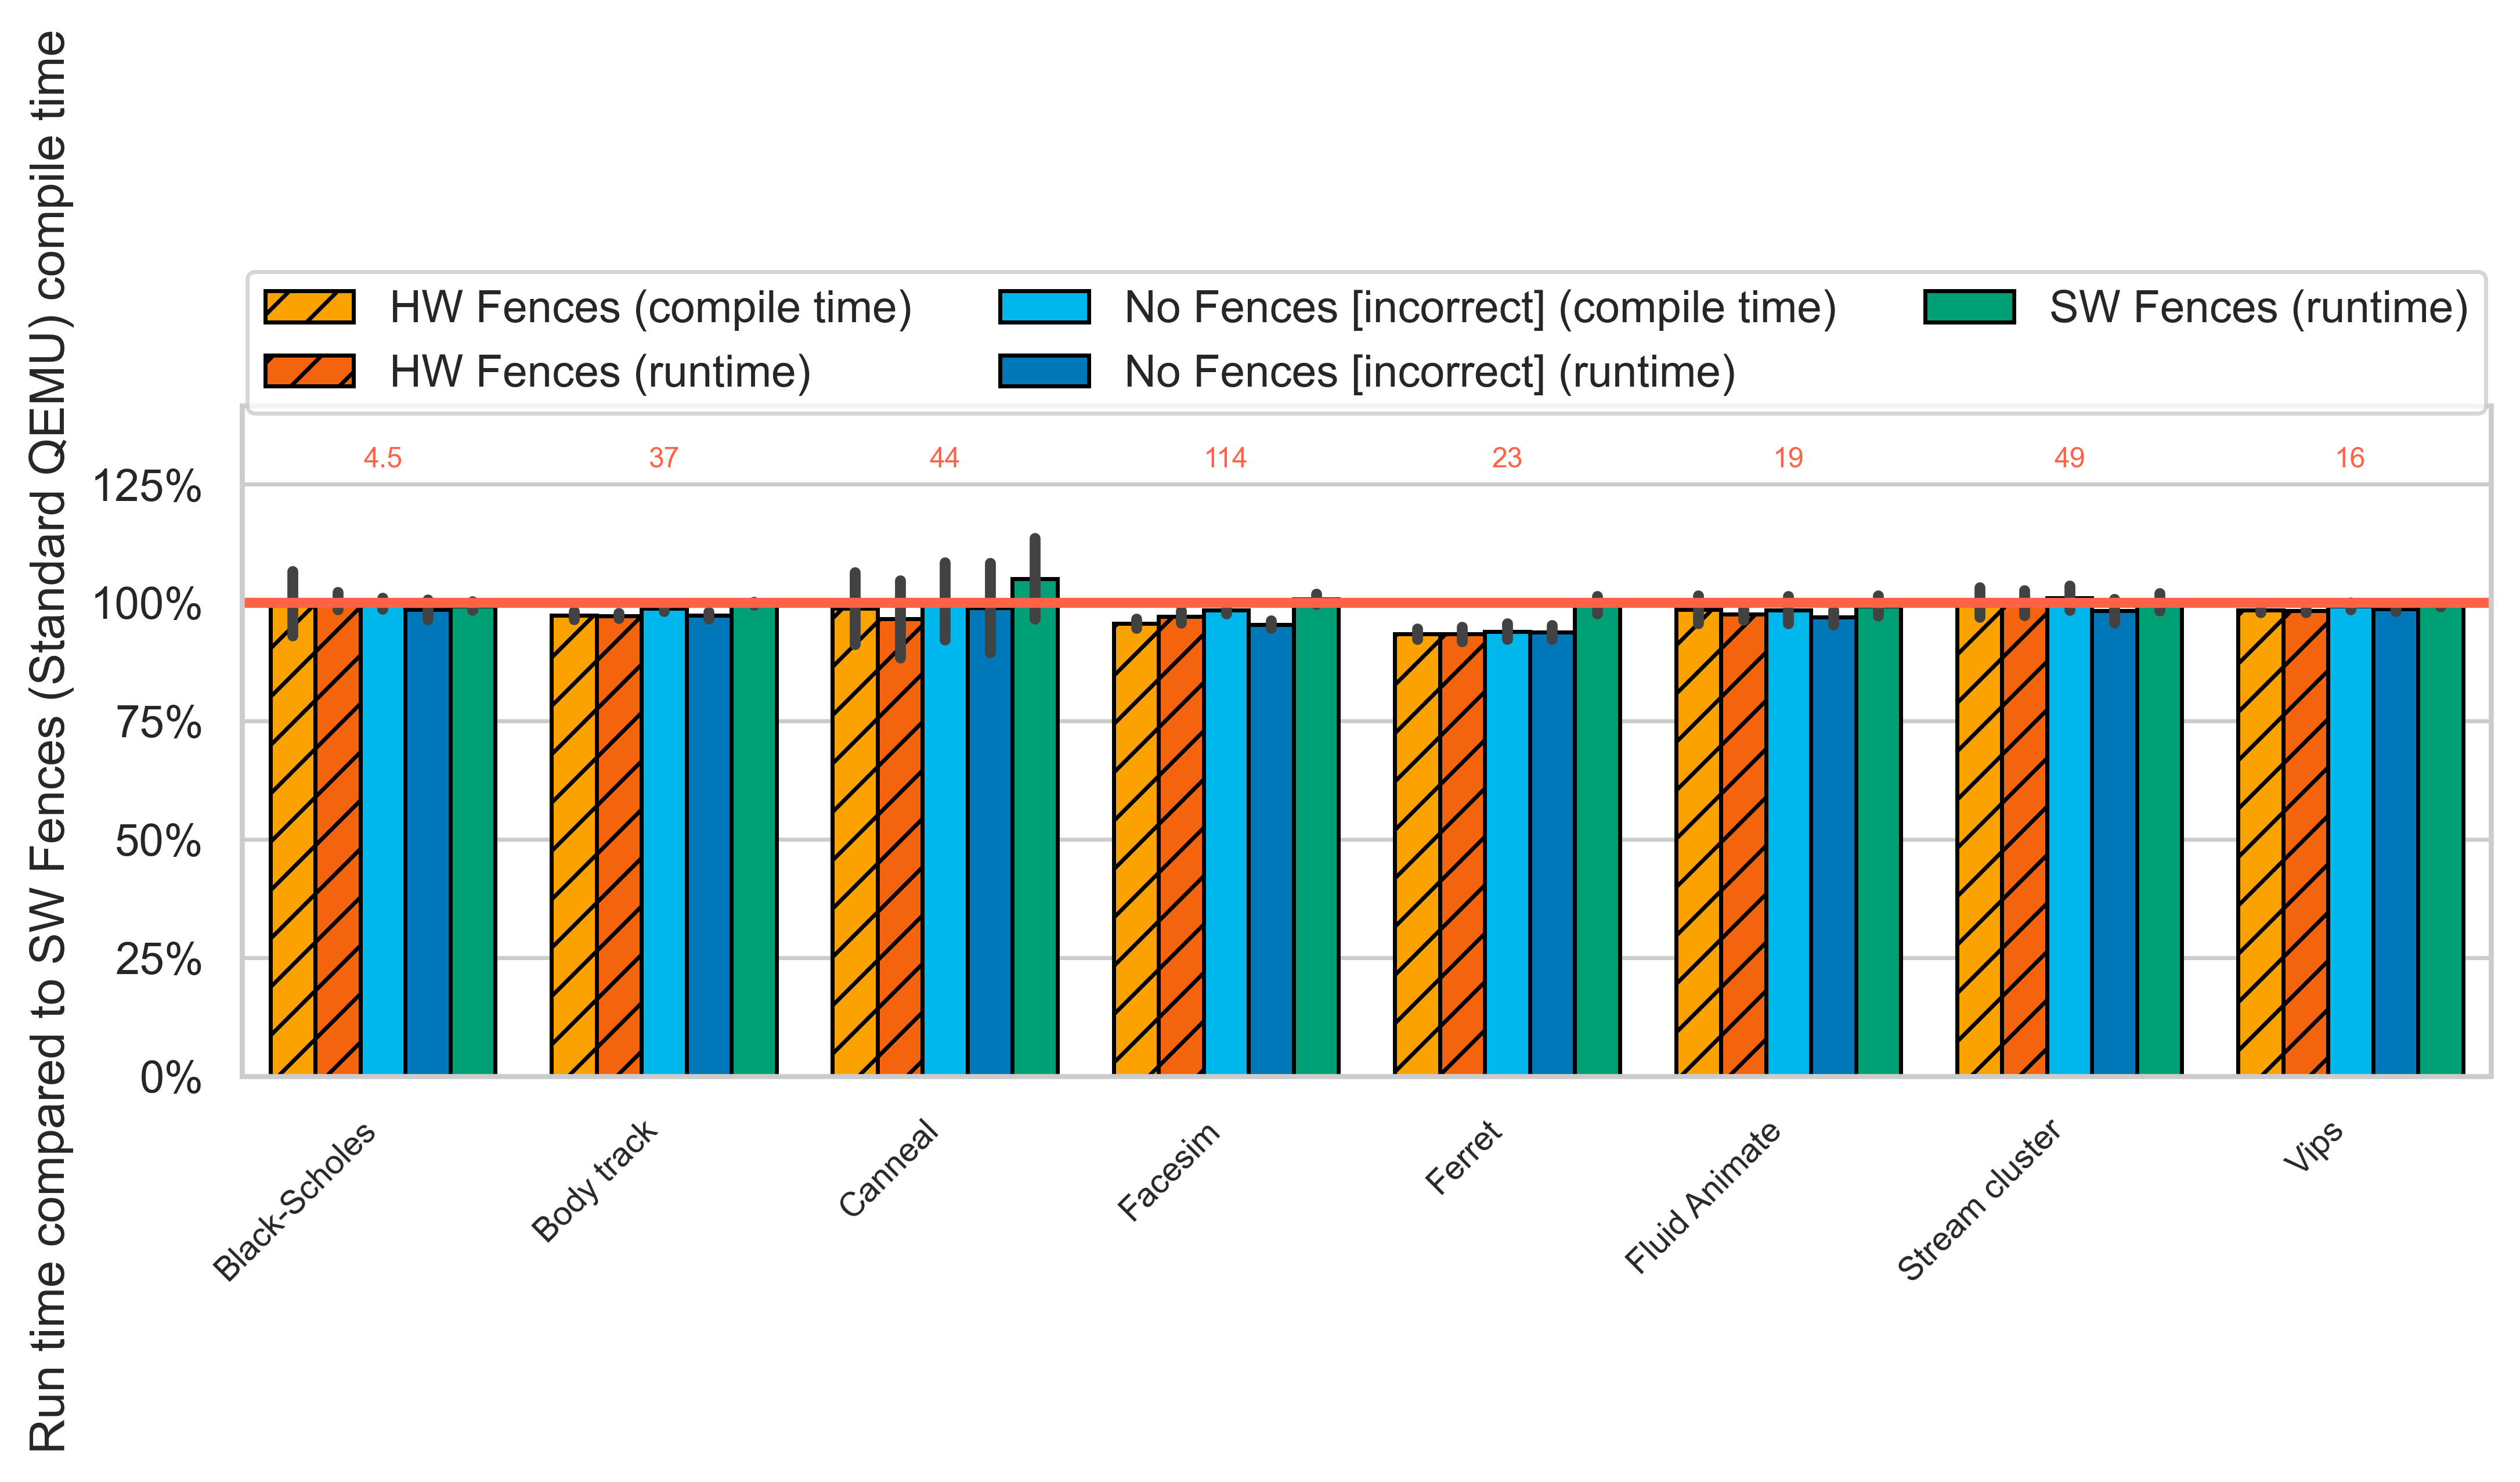

In [10]:
# Plot
fig = plt.figure(figsize=(10, 3), dpi=500)
sbs.set(style="whitegrid")
palette = {
    'orange': '#faa200',
    'sky blue': '#00b7ec',
    'bluish green': '#00a077',
    'yellow': '#f5e636',
    'blue': '#0077b8',
    'vermillion': '#f3640d',
    'reddish purple': '#e47ead'
}
ax = sbs.barplot(data=df_norm, ci='sd',
                 x='bench', y='norm',
                 hue='label',# palette=palette,
                 order=sorted(set(df_norm['bench'])))
plt.grid(visible=True, axis='y')
plt.xticks(rotation=45, ha="right", fontsize='x-small')
ax.set_axisbelow(True)
plt.xlabel("")
max_val = max(df_norm['norm'].values)
plt.ylim(0, max_val*1.1)
#plt.ylim(0, max_val)
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%d%%'))
plt.ylabel("Run time compared to SW Fences (Standard QEMU) compile time")
plt.axhline(y=100, xmin=0, xmax=1, color='tomato', linewidth=2.5)
# Annotate the raw value of the baseline

for idx, value in enumerate(sorted(set(base_means))):
    tmp = df_norm.loc[df_norm['bench'] == bench_readable_dict[value] ]['norm'].values.mean()
    v = base_means[value]
    if v < 10:
        v_str = f"{v:.1f}"
    else:
        v_str = f"{v:.0f}"
    plt.text(idx, max(tmp, max_val - .03), v_str, fontsize='xx-small', color='tomato', ha='center')
    
# Set color + hatch
style = {
    'fill': [ True, True, True, True, True, True ],
    'color': [ palette['orange'], palette['vermillion'], palette['sky blue'], palette['blue'],  palette['bluish green'] ],
    'hatch': [ '//', '//', '', '', ''],
    'edgecolor': [ 'black', 'black', 'black', 'black', 'black' ]
}

for idx, bar in enumerate(ax.patches):
    bar_nr = int(idx / len(base_means))
    bar.set(color=style['color'][bar_nr], fill=style['fill'][bar_nr],
            hatch=style['hatch'][bar_nr], edgecolor=style['edgecolor'][bar_nr])

plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2),borderaxespad=0, ncol=3)

In [11]:
fig.savefig(f"{input_csv[:-3]}pdf", dpi=500, bbox_inches='tight')

In [12]:
# Compute fence cost
fence_cost = 100 * (1 - mean_df['No Fences:simlarge:4'] / mean_df['SW Fences:simlarge:4'])
print(f"Average time spent on fences: {fence_cost.mean():.2f}%")

Average time spent on fences: 3.17%


In [13]:
# tcg-tso gain
for b in sorted(set(df_norm['bench'])):
    d = df_norm.loc[df_norm['bench'] == b]
    d = d.loc[d['tag'] == 'tcg-tso']
    print(f"{b}: {d['value'].values.mean():.2f}")

Black-Scholes: nan
Body track: nan
Canneal: nan
Facesim: nan
Ferret: nan
Fluid Animate: nan
Stream cluster: nan
Vips: nan


/tmp/ipykernel_17541/344366082.py:5: RuntimeWarning: Mean of empty slice.
  print(f"{b}: {d['value'].values.mean():.2f}")
/usr/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [14]:
mean_df['tcg-tso-pct'] = 100 * (1 - mean_df['tcg-tso'] / mean_df['qemu'])
mean_df

KeyError: 'tcg-tso'

In [ ]:
mean_df['tcg-tso-pct'].values.mean()

In [ ]:
mean_df['fence-opt-improv'] = 100 * (1 - mean_df['fence-opt'] / mean_df['risotto'])
mean_df[['bench','fence-opt-improv']]